# **Credit Card Fraud Detection with Python**

## Content

1. [Introduction](#introduction)
2. [What are Libraries and Why Do We Need Them?](#libraries)
3. [Installing and Importing Libraries](#installing-importing)
4. [About the Libraries](#about-libraries)
   - 4.1 [Numpy](#numpy)
   - 4.2 [Pandas](#pandas)
   - 4.3 [Matplotlib](#matplotlib)
   - 4.4 [Seaborn](#seaborn)
   - 4.5 [Scikit-learn](#scikit-learn)
5. [Steps involved in building an ML Model](#ml)
6. [Loading the Dataset](#loading-dataset)
6. [Exploring the Dataset](#exploring-dataset)
7. [Data Visualization](#data-visualization)
8. [Data Preprocessing](#data-preprocessing)
   - 8.1 [Handling Missing Values](#handling-missing-values)
   - 8.2 [Splitting the Data](#splitting-data)
   - 8.3 [Dealing with Imbalanced Data](#dealing-imbalanced-data)
   - 8.4 [Standardizing the Features](#standardizing-features)
9. [Building and Training the Model](#building-training-model)
10. [Making Predictions](#making-predictions)
11. [Evaluating the Model](#evaluating-model)
   - 11.1 [Classification Report](#classification-report)
   - 11.2 [Confusion Matrix](#confusion-matrix)
     - 11.2.1 [Layout of a Confusion Matrix](#aconfusion-matrix)
   - 11.3 [ROC Curve and AUC](#roc-auc)
12. [User Input for Prediction](#user-input)
13. [Conclusion](#conclusion)

---

## Introduction <a name="introduction"></a>
In this tutorial, we will walk through a complete machine learning project to detect credit card fraud. We will use Python and several popular libraries, including scikit-learn, pandas, numpy, matplotlib, and seaborn. By the end of this tutorial, you will have a good understanding of how to use these libraries to build and evaluate a machine learning model.

---

## What are Libraries and Why Do We Need Them? <a name="libraries"></a>


Libraries are collections of pre-written code that you can use to perform common tasks. They save you time and effort by providing ready-made functions and tools. In Python, libraries are crucial for data science and machine learning because they offer a wide range of functionalities, from data manipulation to advanced mathematical operations and visualization.

**Dependencies?**

These libraries provide specific functionalities in programming, while dependencies are external components essential for a project's proper functioning, ensuring compatibility and reliability. Examples include NumPy and Pandas as libraries, and specific versions of these as dependencies in Python projects.

---

## Installing and Importing Libraries <a name="installing-importing"></a>
First, let's install and import the necessary libraries.

### Installing Libraries
To install libraries, you can use the `pip` command. In Google Colab, you can install libraries directly in a code cell.

```python
!pip install numpy pandas matplotlib seaborn scikit-learn


**Importing Libraries**

Now, let's import the libraries we will use in this tutorial.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE


#About the Libraries <a name="about-libraries"></a>

**Numpy <a name="numpy"></a>**

Numpy is a powerful library for numerical computations. It provides support for arrays, matrices, and many mathematical functions.

![Numpy Logo](https://th.bing.com/th/id/OIP.Q5FR3UBk0lctzx8vwbcMTQHaFO?rs=1&pid=ImgDetMain)


**Pandas <a name="pandas"></a>**

Pandas is a library used for data manipulation and analysis. It offers data structures like DataFrames, which are great for handling tabular data.

![Pandas Logo](https://th.bing.com/th/id/OIP.UhPrO71Q-C3PgpwzRgSnBAHaD4?rs=1&pid=ImgDetMain)

**Matplotlib <a name="matplotlib"></a>**

Matplotlib is a plotting library used for creating static, interactive, and animated visualizations in Python.

**Seaborn <a name="seaborn"></a>**

Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

**Scikit-learn <a name="scikit-learn"></a>**

Scikit-learn is a machine learning library that provides simple and efficient tools for data mining and data analysis.

It is a comprehensive machine learning library that includes various algorithms for classification, regression, clustering, and more. It also provides tools for model selection, evaluation, and preprocessing of data.



#The steps involved in building Machine Learning models <a name="ml"></a>
![ML immage](https://th.bing.com/th/id/OIP.g8FbnR-xikAiWqcsyRCq4QHaDa?rs=1&pid=ImgDetMain)

#**Loading the Dataset <a name="loading-dataset"></a>**

We will use the Credit Card Fraud Detection dataset, which contains transactions made by credit cards in September 2013 by European cardholders. The dataset is highly unbalanced, with the positive class (frauds) accounting for 0.172% of all transactions.

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
df = pd.read_csv(url)


**Exploring the Dataset <a name="exploring-dataset"></a>**

To understand the dataset, we'll use Pandas to load the data and perform initial exploratory data analysis (EDA). Functions like head(), info(), and describe() will help us get insights into the dataset's structure, features, and basic statistics.

Let's take a look at the first few rows of the dataset to understand its structure.

And the last few rows respectively.

In [ ]:
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

We can also check the dataset's information and summary statistics.

In [ ]:
print(df.info())

In [ ]:
print(df.describe())

**Data Visualization <a name="data-visualization"></a>**

Visualizing data helps in understanding distributions, correlations, and patterns. Matplotlib and Seaborn provide functions to create various plots such as histograms, scatter plots, and heatmaps, enabling us to visualize relationships and anomalies in the data.

**Let's visualize the class distribution to see the imbalance in the dataset.**

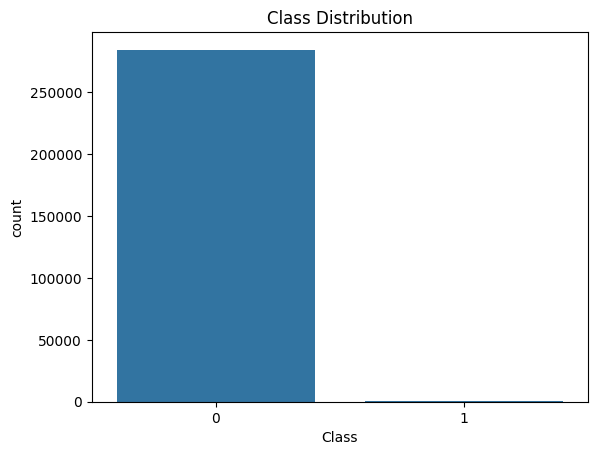

In [ ]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

#**Data Preprocessing <a name="data-preprocessing"></a>**

**Handling Missing Values <a name="handling-missing-values"></a>**

Check for missing values and handle them if necessary.

In [ ]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Splitting the Data <a name="splitting-data"></a>**

We will split the dataset into features (X) and target variable (y).

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


#**Dealing with Imbalanced Data <a name="dealing-imbalanced-data"></a>**

---
**What is Imbalanced Data**: Imbalanced data occurs when one class (e.g., fraudulent transactions) is underrepresented compared to another class (e.g., non-fraudulent transactions).

---
**Why Handle Imbalanced Data**: Imbalanced datasets can lead to biased models that favor the majority class. Techniques like oversampling (SMOTE) and undersampling help balance the dataset, ensuring better model performance.

---

**SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This technique helps in improving the model's ability to detect fraud cases.

To handle the imbalanced dataset, we will use this technique.

smote function

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


Then, we will split the data into training and testing sets.

Before training the model, we split the dataset into training and testing sets using `train_test_split()` from Scikit-learn. This ensures that the model's performance can be evaluated on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


**Standardizing the Features <a name="standardizing-features"></a>**

Standardization is important for many machine learning algorithms.

Standardization (or normalization) of features ensures that all features contribute equally to the model training process. We use StandardScaler from Scikit-learn to standardize numerical features, making them have zero mean and unit variance.


 We will use StandardScaler from scikit-learn to standardize the features.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#**Building and Training the Model <a name="building-training-model"></a>**

Machine learning models learn patterns from data to make predictions. We'll use algorithms like RandomForestClassifier, which builds multiple decision trees and merges them together to improve predictive accuracy.

---

**Using Advanced Algorithms <a name="advanced-algorithms"></a>**

We will use a Random Forest Classifier and a Gradient Boosting Classifier for this task. These are ensemble methods that combine multiple models to improve accuracy and prevent overfitting.

---

Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)


GradientBoostingClassifier(random_state=42)

**Making Predictions <a name="making-predictions"></a>**

Once the model is trained, it can predict whether a transaction is fraudulent or not based on its input features. Predictions are made using the predict() method of the trained model.


Use the trained models to make predictions on the test set.

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)


#**Evaluating the Models <a name="evaluating-model"></a>**

**Classification Report <a name="classification-report"></a>**

A classification report provides metrics such as precision, recall, F1-score, and support for each class. It helps in understanding the model's performance in detecting fraudulent transactions.

---
**Precision**:

What it is: Precision measures the accuracy of the positive predictions. It tells us what proportion of the predicted positive cases were actually positive.
Why it matters: High precision means that when the model predicts a positive case, it is usually correct. It’s important when the cost of false positives is high.
Example: If a fraud detection system identifies 10 transactions as fraudulent and 8 of them are actually fraudulent, the precision is 80%.

---

**Recall**:

What it is: Recall (also known as sensitivity or true positive rate) measures the ability of the model to identify all actual positive cases. It tells us what proportion of the actual positive cases were correctly identified by the model.
Why it matters: High recall means that the model catches most of the actual positive cases. It’s important when the cost of false negatives is high.
Example: If there are 20 actual fraudulent transactions and the model identifies 15 of them, the recall is 75%.

---

**F1-Score**:

What it is: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both concerns.
Why it matters: It is useful when you need a balance between precision and recall and there is an uneven class distribution.
Example: If a model has a precision of 70% and a recall of 80%, the F1-score will be around 74%.

---

**Support**:

What it is: Support is the number of actual occurrences of each class in the dataset. It gives you an idea of how many instances of each class are present.
Why it matters: Knowing the support helps in understanding the context of precision, recall, and F1-score, especially if the classes are imbalanced.
Example: If there are 1000 transactions and 50 of them are fraudulent, the support for the fraud class is 50 and for the non-fraud class is 950.

---

Generate a classification report to evaluate the model performance.



In [ ]:
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [ ]:
print("Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56750
           1       0.99      0.98      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



**Confusion Matrix <a name="confusion-matrix"></a>**

A confusion matrix is a table that summarizes the actual and predicted classifications done by a classification model. It helps visualize the performance of the model by showing the counts of true positives, true negatives, false positives, and false negatives.

Visualize the confusion matrix for each model.

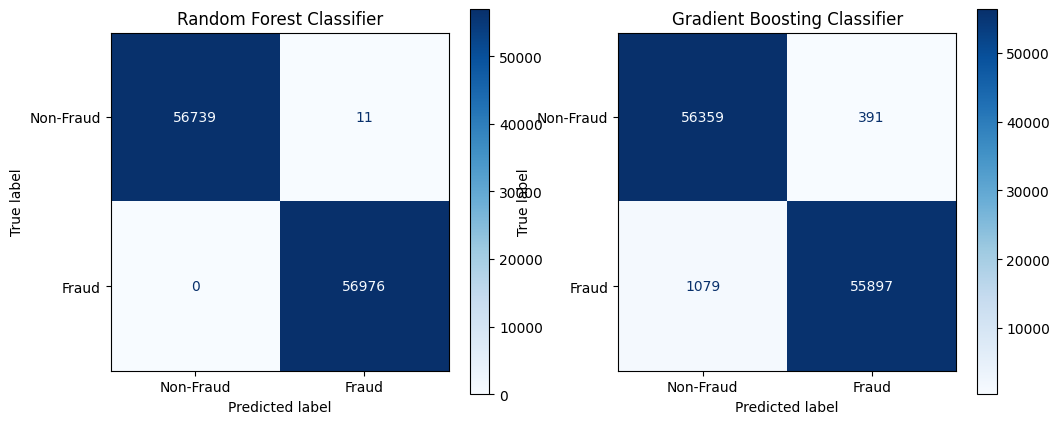

In [ ]:
# Predict using the models
rf_pred = rf_model.predict(X_test_scaled)
gb_pred = gb_model.predict(X_test_scaled)

# Create confusion matrices
rf_cm = confusion_matrix(y_test, rf_pred)
gb_cm = confusion_matrix(y_test, gb_pred)

# Display confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Non-Fraud', 'Fraud']).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Random Forest Classifier')

plt.subplot(1, 2, 2)
ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=['Non-Fraud', 'Fraud']).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Gradient Boosting Classifier')

plt.show()



**Layout of a Confusion matrix<a name="aconfusion-matrix"></a>**

The four squares in a confusion matrix represent the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These counts are crucial for understanding the performance of a classification model. Here’s a detailed breakdown of each quadrant in the context of fraud detection:

#Explanation of Each Quadrant
**True Negative (TN)**

Location: Top-left
Description: The number of correctly predicted non-fraudulent transactions. Both the actual and predicted values are negative (non-fraud).
Significance: Indicates how well the model identifies legitimate transactions.

---

**False Positive (FP)**

Location: Top-right
Description: The number of non-fraudulent transactions incorrectly predicted as fraudulent. The actual value is negative (non-fraud), but the predicted value is positive (fraud).
Significance: Indicates the instances where the model mistakenly flags legitimate transactions as fraud.

---
**False Negative (FN)**

Location: Bottom-left
Description: The number of fraudulent transactions incorrectly predicted as non-fraudulent. The actual value is positive (fraud), but the predicted value is negative (non-fraud).
Significance: Indicates the instances where the model fails to detect fraud . These are missed fraud cases, which can be more problematic than FPs.

---

**True Positive (TP)**

Location: Bottom-right
Description: The number of correctly predicted fraudulent transactions. Both the actual and predicted values are positive (fraud).
Significance: Indicates how well the model detects actual fraudulent transactions.

                 Predicted Negative  | Predicted Positive
                 Actual Negative |        TN         |         FP

                 Actual Positive |        FN         |         TP

**ROC Curve and AUC <a name="roc-auc"></a>**

The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values. AUC (Area Under the ROC Curve) quantifies the model's ability to distinguish between classes, with higher values indicating better performance.

Plot ROC curves and calculate AUC for model evaluation.

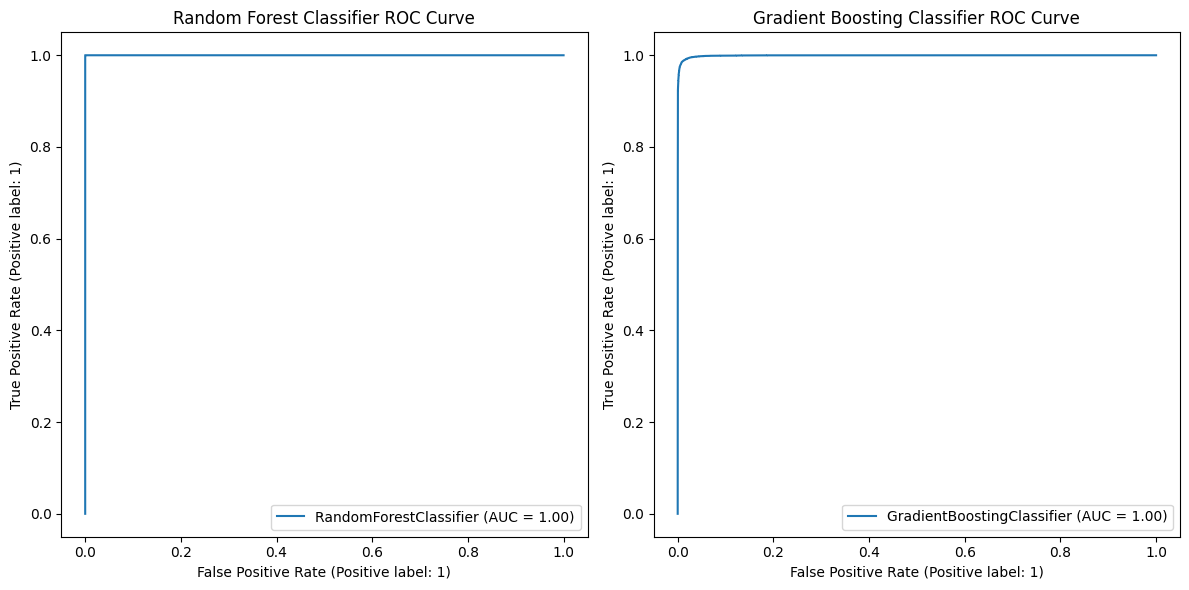

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test, ax=axes[0])
axes[0].set_title('Random Forest Classifier ROC Curve')

# Plot ROC Curve for Gradient Boosting
RocCurveDisplay.from_estimator(gb_model, X_test_scaled, y_test, ax=axes[1])
axes[1].set_title('Gradient Boosting Classifier ROC Curve')

plt.tight_layout()
plt.show()

**User Input for Prediction <a name="user-input"></a>**

Allow users to input data for prediction using the trained model.

We will define a function to take user input, preprocess it, and make a prediction.


In [ ]:
def get_user_input():
    user_input = input("Enter the transaction data as a list of floats separated by commas: ")
    user_data = np.array([float(i) for i in user_input.split(',')]).reshape(1, -1)
    user_data_scaled = scaler.transform(user_data)
    prediction = rf_model.predict(user_data_scaled)
    return "Fraud" if prediction[0] == 1 else "Not Fraud"

print(get_user_input())


Enter the transaction data as a list of floats separated by commas: 200.0, 10.0, 0.9, -0.5, 0.2, 0.1, -0.3, 0.5, 0.8, 0.4, -0.1, -0.2, 0.6, 0.3, -0.7, 0.2, 0.1, 0.5, -0.4, 0.9, -0.2, 0.3, 0.7, -0.8, 0.6, 0.2, -0.5, 0.1, -0.3, 0.4
Not Fraud


In [ ]:
import warnings

# Suppress specific sklearn warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.base')


In [ ]:
def get_user_input():
    user_input = input("Enter the transaction data as a list of floats separated by commas: ")
    user_data = np.array([float(i) for i in user_input.split(',')]).reshape(1, -1)
    user_data_scaled = scaler.transform(user_data)
    prediction = gb_model.predict(user_data_scaled)
    return "Fraud" if prediction[0] == 1 else "Not Fraud"

print(get_user_input())


#Conclusion <a name="conclusion"></a>

In this tutorial, we explored the process of building a machine learning model for credit card fraud detection using Python and various libraries such as scikit-learn, pandas, numpy, matplotlib, and seaborn. We discussed data preprocessing, model training with advanced algorithms, evaluation metrics like classification report, confusion matrix, ROC curve, and AUC. Finally, we prepared for user input prediction, demonstrating a comprehensive approach to leveraging machine learning for fraud detection. We hope this tutorial has provided you with a good foundation for using Python libraries in machine learning projects. Thank you.

---
#Congrats! That's it for this tutorial.

---
<h1> Author(s):</h1>


# **Abigail Akua Sika Boateng**


**Social Media Handles**:
* [Abigail (Akua Sika) Boateng](https://www.linkedin.com/in/abigail-boateng-287102244/)



**Email:** abigailakuasikaboateng.com

---
# **Akua Serwaa Nkrumah**


**Social Media Handles**:
* [ Akua Serwaa Nkrumah ](https://www.linkedin.com/in/akua-serwaa-nkrumah-a4b782202)



**Email:** nkrumahakua2002@gmail.com

---

*This notebook was originally created by Ghana Data Science Summit for the [IndabaX Ghana](https://www.indabaxghana.com/) 2024 Conference and is published under [MIT license](https://choosealicense.com/licenses/mit/).*